## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
combined_df.to_csv("data/combined.csv", index=False, header=True)

## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = combined_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)': ['mean','median','var','std','sem']})
summary_stats.columns = ['Mean', 'Median', 'Variance','Standard Deviation','Standard Error of Mean']

summary_stats.head()

,Mean,Median,Variance,Standard Deviation,Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar plots

### Number of data points for each treatment regimen using pandas

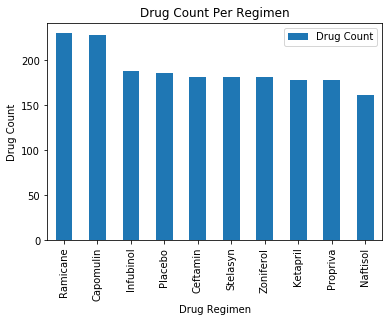

In [3]:
# Get counts per regimen
regimen_count = combined_df['Drug Regimen'].value_counts()
regimen = [reg for reg in combined_df['Drug Regimen'].unique()]

df = pd.DataFrame({
    "Drug Regimen": regimen,
    "Drug Count": regimen_count
})

fig,ax = plt.subplots()
df.plot.bar(x="Drug Regimen", y="Drug Count", ax=ax)
ax.set(title="Drug Count Per Regimen", xlabel = "Drug Regimen", ylabel="Drug Count")
ax.legend()

### Number of data points for each treatment regimen using pyplot

Text(0, 0.5, 'Drug Count')

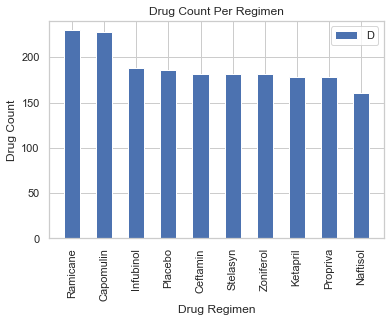

In [26]:
plt.bar(regimen, regimen_count,linewidth=1,align="center",width=0.5)
plt.xticks(rotation=90)
plt.ylim(0, max(regimen_count)+10)

plt.legend("Drug Count")
plt.title("Drug Count Per Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Drug Count")



## Pie plots

([<matplotlib.patches.Wedge at 0x134603750>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

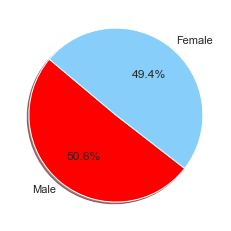

In [60]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_df = combined_df[['Sex']]
labels = ["Male", "Female"]
explode = (0, 0)
colors = ["red","lightskyblue"]

df = pd.DataFrame({
    "labels" : labels,
    "explode" : explode,
    "colors" : colors
})

plt.pie(gender_df['Sex'].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


([<matplotlib.patches.Wedge at 0x1342c81d0>,
 [Text(-0.6908564105755949, -0.8559891471079557, 'Male'),
  Text(0.690856410575595, 0.8559891471079556, 'Female')],
 [Text(-0.37683076940486987, -0.46690317114979396, '50.6%'),
  Text(0.3768307694048699, 0.46690317114979385, '49.4%')])

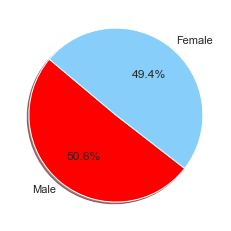

In [61]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(combined_df['Sex'].value_counts(), explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

promising_regimens_df = combined_df.loc[combined_df['Drug Regimen'].isin(['Capomulin','Ramicane','Infubinol','Ceftamin'])]
promising_regimens_df = promising_regimens_df.loc[promising_regimens_df['Timepoint'] == 45]
promising_regimens_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


### Remicane Quartiles and outliers

In [8]:

ramicane_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Ramicane'])]
ramicane = ramicane_regimens_df['Tumor Volume (mm3)']
quartiles = ramicane.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


### Capomulin Quartiles and outliers

In [9]:

capomulin_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Capomulin'])]
capomulin = capomulin_regimens_df['Tumor Volume (mm3)']
quartiles = capomulin.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of capomulin is: {iqr}")
print(f"The the median of capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of capomulin is: 7.781863460000004
The the median of capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


### Infubinol Quartiles and outliers

In [10]:
infubinol_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Infubinol'])]
infubinol = infubinol_regimens_df['Tumor Volume (mm3)']
quartiles = infubinol.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Infubinol is: 62.75445141
The upper quartile of Infubinol is: 67.68556862
The interquartile range of Infubinol is: 4.9311172099999965
The the median of Infubinol is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


### Ceftamin Quartiles and outliers

In [11]:
ceftaminl_regimens_df = promising_regimens_df.loc[promising_regimens_df['Drug Regimen'].isin(['Ceftamin'])]
ceftaminl = ceftaminl_regimens_df['Tumor Volume (mm3)']
quartiles = ceftaminl.quantile([.25,.5,.75])

lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ceftamin is: 61.43389223
The upper quartile of Ceftamin is: 67.52748237
The interquartile range of Ceftamin is: 6.093590140000003
The the median of Ceftamin is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


### Box Plot

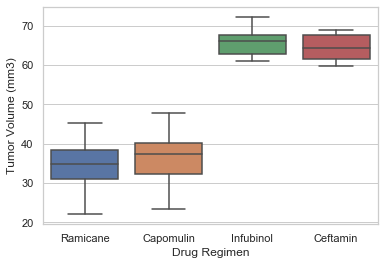

In [12]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
sns.set(style="whitegrid")
ax = sns.boxplot(x="Drug Regimen", y="Tumor Volume (mm3)", data=promising_regimens_df)

## Line and scatter plots

### Line plot - Time point vs Tumor volume for a mouse treated with Capomulin

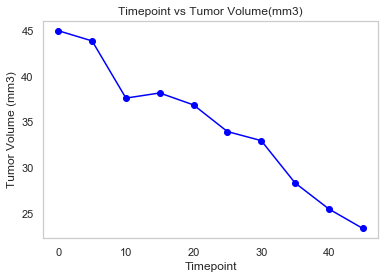

In [13]:
s185_capomulin_df = combined_df.loc[(combined_df['Drug Regimen'] == 'Capomulin') & (combined_df['Mouse ID'] == 's185')]

timepoint = s185_capomulin_df['Timepoint']
tumorvolume = s185_capomulin_df['Tumor Volume (mm3)']

plt.plot(timepoint,tumorvolume, marker="o", color="blue")

plt.title("Timepoint vs Tumor Volume(mm3)")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid(False)

plt.show()

In [65]:
# df = capomulin_df.groupby(['Mouse ID']).mean()
# df

unique_mice_df = capomulin_df.groupby(['Mouse ID']).mean()
# unique_mice_df

mouse_weights = unique_mice_df['Weight (g)']
mouse_weights

Mouse ID
b128    22.0
b742    21.0
f966    17.0
g288    19.0
g316    22.0
i557    24.0
i738    20.0
j119    23.0
j246    21.0
l509    21.0
l897    19.0
m601    17.0
m957    19.0
r157    25.0
r554    17.0
r944    25.0
s185    17.0
s710    23.0
t565    17.0
u364    17.0
v923    21.0
w150    23.0
w914    21.0
x401    15.0
y793    17.0
Name: Weight (g), dtype: float64

### Scatter plot - Mouse weight vs Average tumor volume for Capomulin regimen

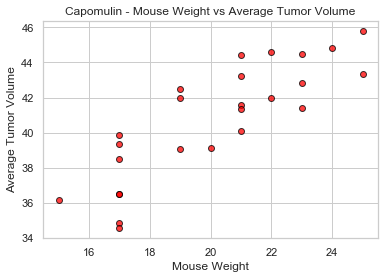

In [66]:
capomulin_df = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
unique_mice_df = capomulin_df.groupby(['Mouse ID']).mean()

mouse_weights = unique_mice_df['Weight (g)']
average_tumor_volume = unique_mice_df['Tumor Volume (mm3)']

plt.scatter(mouse_weights, average_tumor_volume, marker="o", facecolors="red", edgecolors="black",
            alpha=0.75)

plt.title('Capomulin - Mouse Weight vs Average Tumor Volume')
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

### Correlation coefficient - For mouse weight and average tumor volume for the Capomulin regimen.

In [15]:
# mouse_weights = pd.Series(capomulin_df['Weight (g)'].unique())

# average_tumor_volume = capomulin_df.groupby(['Weight (g)']).agg({'Tumor Volume (mm3)': ['mean']})
average_tumor_volume.columns = ['Mean']
mean = average_tumor_volume['Mean']

correlation = st.pearsonr(mouse_weights,mean)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.93


### Linear regression model - For mouse weight and average tumor volume for the Capomulin regimen

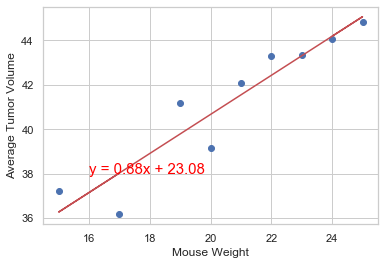

In [17]:

x_values = mouse_weights
y_values = average_tumor_volume['Mean']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,38),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume')
plt.show()
